<a href="https://colab.research.google.com/github/OseiasBeu/StatisticsCourse/blob/main/Curso_Analise_de_Experimentos/Planejamento_experimentos_aula.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 style='color: blue; font-size: 34px; font-weight: bold;'> Planejamento de Experimentos 
</h1>


# <font color='red' style='font-size: 30px;'>1.0 Introdução   </font>
<hr style='border: 2px solid red;'>




<p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>    
<i> “Chamar um especialista em estatística depois que o experimento foi feito pode ser o mesmo que pedir para ele fazer um exame post-mortem. Talvez ele consiga dizer do que foi que o experimento morreu.”  </i>     
</p>    

<p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: right; text-indent: 0px;'>    
    <b>Sir Ronald Fisher</b>  

<hr>






# <font color='red' style='font-size: 30px;'> Introdução à análise de experimentos   </font>
<hr style='border: 2px solid red;'>

# <font color = 'purple'> Inserindo o experimento num Data Frame </font>


<p style='margin: 30px 30px;'>
    
<hr style = 'border: 1px solid purple;'>

## Importando as bibliotecas 

### Pandas

https://pandas.pydata.org/

In [1]:
import pandas as pd

### Numpy

http://www.numpy.org/

In [2]:
import numpy as np



<p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>
    <font color="red"> <b>Ensaios realizados na forma normalizada</b> 


<img width='800px' src='https://github.com/OseiasBeu/StatisticsCourse/blob/main/Curso_Analise_de_Experimentos/figuras/Figura_2.png?raw=1'>

 
   
   
    


<p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>
<font color="MidnightBlue"> Construindo uma matriz representando todos os ensaios realizados:


In [3]:
ensaios = np.array([[-1,-1],[1,-1],[-1,1],[1,1]])

### pyDOE2

https://pypi.org/project/pyDOE2/

In [4]:
!pip install pyDOE2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for pyDOE2: filename=pyDOE2-1.3.0-py3-none-any.whl size=25539 sha256=5d3ad11ce1efc57f718c21d76afb00dcace544c6243f2592c52512832846440c
  Stored in directory: /root/.cache/pip/wheels/49/91/2d/d08e80806bf7756193541f6c03c0492af288fcd6158d3d0998
Successfully built pyDOE2


In [5]:
import pyDOE2 as doe

## Costruindo um planejamento fatorial de 2²


In [6]:
ensaios = doe.ff2n(2)

In [7]:
ensaios

array([[-1., -1.],
       [ 1., -1.],
       [-1.,  1.],
       [ 1.,  1.]])

## Incerindo o planejamento em um Data Frame

In [8]:
experimento = pd.DataFrame(ensaios, columns=['Farinha','Chocolate'])

In [9]:
experimento

,Farinha,Chocolate
0,-1.0,-1.0
1,1.0,-1.0
2,-1.0,1.0
3,1.0,1.0


### Inserindo coluna com os resultados 

In [10]:
experimento['Porcoes'] = [19,37,24,49]

In [11]:
experimento

,Farinha,Chocolate,Porcoes
0,-1.0,-1.0,19
1,1.0,-1.0,37
2,-1.0,1.0,24
3,1.0,1.0,49


<hr>
<p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>
    <font color="MidnightBlue"> <b>Conclusão:</b> Temos, por fim, nosso experimento representado por um <i>DataFrame</i> do Pandas. Usaremos este <i>DataFrame</i> para iniciarmos a análise do nosso experimento. 
    
<hr>   

# <font color = 'purple'> Analisando graficamente o experimento   </font>


<p style='margin: 30px 30px;'>
    
<hr style = 'border: 1px solid purple;'>

###  Importando o Seaborn

https://seaborn.pydata.org

In [12]:
import seaborn as sns

In [13]:
# paletas -> Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r
sns.set_palette('terrain')
# estilo -> white, dark, whitegrid, darkgrid, ticks
sns.set_style('darkgrid')

### Para a farinha

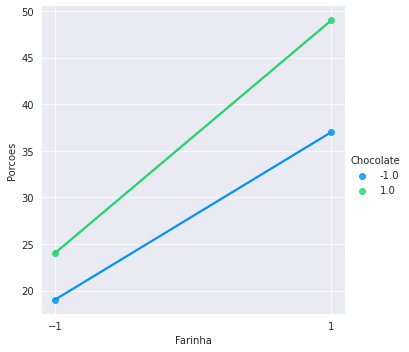

In [14]:
ax1 = sns.lmplot(data=experimento,x='Farinha',y='Porcoes', ci=None, hue='Chocolate')
ax1.set(xticks= (-1,1))

### Para o chocolate

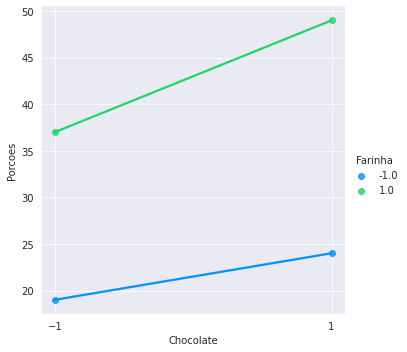

In [15]:
ax2 = sns.lmplot(data=experimento,x='Chocolate',y='Porcoes', ci=None, hue='Farinha')
ax2.set(xticks= (-1,1))

# <font color = 'purple'> Ajustando o modelo estatístico </font>


<p style='margin: 30px 30px;'>
    
<hr style = 'border: 1px solid purple;'>

<hr>

<img width='800px' src='https://github.com/OseiasBeu/StatisticsCourse/blob/main/Curso_Analise_de_Experimentos/figuras/Figura_3.png?raw=1'>

<p style='margin: 30px 30px;'> 

<hr>


### Bibliotecas  Stats Model


In [16]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### .

In [17]:
modelo = smf.ols(data=experimento, formula='Porcoes ~ Farinha + Chocolate + Farinha:Chocolate')

In [18]:
modelo_ajustado   = modelo.fit()

In [19]:
print(modelo_ajustado.summary())

                            OLS Regression Results                            
Dep. Variable:                Porcoes   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Wed, 29 Jun 2022   Prob (F-statistic):                nan
Time:                        01:30:45   Log-Likelihood:                    inf
No. Observations:                   4   AIC:                              -inf
Df Residuals:                       0   BIC:                              -inf
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            32.2500        na

/usr/local/lib/python3.7/dist-packages/statsmodels/stats/stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  "samples were given." % int(n), ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1648: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1649: RuntimeWarning: invalid value encountered in double_scalars
  * (1 - self.rsquared))
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1665: RuntimeWarning: invalid value encountered in double_scalars
  return self.ssr/self.df_resid
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:867: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/usr/local/lib/python3.7/dist-

# <font color = 'purple'> Aumentando os Graus de liberdade  </font>


<p style='margin: 30px 30px;'>
    
<hr style = 'border: 1px solid purple;'>



<p style='margin: 30px 30px;'>     
    


<hr>


<p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>
    <font color="red"> <b>Replicatas no centro</b>


<img width='800px' src='https://github.com/OseiasBeu/StatisticsCourse/blob/main/Curso_Analise_de_Experimentos/figuras/Figura_5.png?raw=1'> 


<p style='margin: 30px 30px;'> 
    
    
 
    

    
<hr>    

In [21]:
centro = np.array([[0,0,29],
                  [0,0,30],
                  [0,0,29],
                  [0,0,30]])

In [22]:
centro_dataframe = pd.DataFrame(centro,columns=['Farinha','Chocolate','Porcoes'], index=[4,5,6,7])

In [23]:
centro_dataframe

,Farinha,Chocolate,Porcoes
4,0,0,29
5,0,0,30
6,0,0,29
7,0,0,30


### .

In [25]:
experimento =  experimento.append(centro_dataframe)

In [26]:
experimento

,Farinha,Chocolate,Porcoes
0,-1.0,-1.0,19
1,1.0,-1.0,37
2,-1.0,1.0,24
3,1.0,1.0,49
4,0.0,0.0,29
5,0.0,0.0,30
6,0.0,0.0,29
7,0.0,0.0,30


# <font color = 'purple'>  Análise de significância estatística   </font>


<p style='margin: 30px 30px;'>
    
<hr style = 'border: 1px solid purple;'>

In [27]:
modelo = smf.ols(data=experimento,formula='Porcoes ~Farinha + Chocolate + Farinha:Chocolate')

In [28]:
modelo_ajustado = modelo.fit()

In [29]:
print(modelo_ajustado.summary())

                            OLS Regression Results                            
Dep. Variable:                Porcoes   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     45.21
Date:                Wed, 29 Jun 2022   Prob (F-statistic):            0.00152
Time:                        01:47:19   Log-Likelihood:                -14.155
No. Observations:                   8   AIC:                             36.31
Df Residuals:                       4   BIC:                             36.63
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            30.8750      0.71

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))


<p style='margin: 200px 200px;'>    


<hr>


    
 <img width='400px' src='https://github.com/OseiasBeu/StatisticsCourse/blob/main/Curso_Analise_de_Experimentos/figuras/Figura_6.png?raw=1'> 


<p style='margin: 30px 30px;'>    

<hr>


 <img width='600px' src='https://github.com/OseiasBeu/StatisticsCourse/blob/main/Curso_Analise_de_Experimentos/figuras/Figura_7.png?raw=1'> 


<p style='margin: 30px 30px;'>        
    
    
 <hr>   
    

  
 <img width='600px' src='https://github.com/OseiasBeu/StatisticsCourse/blob/main/Curso_Analise_de_Experimentos/figuras/Figura_10.png?raw=1'> 


<p style='margin: 30px 30px;'>       
  
<hr>        


# <font color = 'purple'> Teste de significância estatística usando o <b>t<b>    </font>


<p style='margin: 30px 30px;'>
    
<hr style = 'border: 1px solid purple;'>





<hr>
<img width='600px' src='https://github.com/OseiasBeu/StatisticsCourse/blob/main/Curso_Analise_de_Experimentos/figuras/Figura_11.png?raw=1'> 


<hr>
  <p style='margin: 30px 30px;'>     
<img width='900px' src='https://github.com/OseiasBeu/StatisticsCourse/blob/main/Curso_Analise_de_Experimentos/figuras/Figura_8.png?raw=1'> 


<hr>



<p style='margin: 150px 150px;'>     
<img width='1000px' src='https://github.com/OseiasBeu/StatisticsCourse/blob/main/Curso_Analise_de_Experimentos/figuras/Figura_20.png?raw=1'



<hr>
<p style='margin: 150px 150px;'>    

In [30]:
t_valores = modelo_ajustado.tvalues

In [31]:
t_valores

Intercept            43.494275
Farinha              10.708252
Chocolate             4.233495
Farinha:Chocolate     1.743204
dtype: float64

In [32]:
nome = t_valores.index.tolist()

In [33]:
nome

['Intercept', 'Farinha', 'Chocolate', 'Farinha:Chocolate']

### .

In [37]:
from scipy import stats

### .


In [38]:
distribuicao = stats.t(df=4)

In [39]:
distribuicao.ppf(q=1-0.025)

2.7764451051977987

In [41]:
limite=[distribuicao.ppf(q=1-0.025)]*len(nome)

In [42]:
limite

[2.7764451051977987,
 2.7764451051977987,
 2.7764451051977987,
 2.7764451051977987]

### Plotando o gráfico 

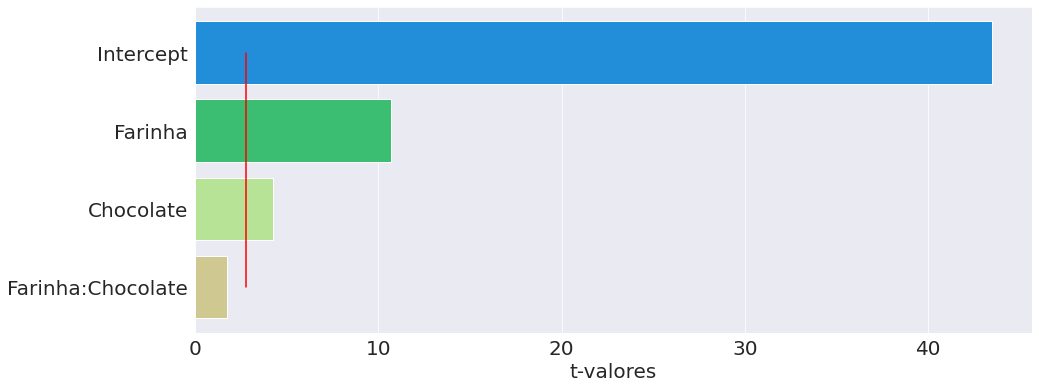

In [43]:
pareto = sns.barplot(x=t_valores, y=nome)
pareto.figure.set_size_inches(15,6)
pareto.tick_params(labelsize=20)
pareto.set_xlabel('t-valores',fontsize=20)

pareto.plot(limite,nome,'r')

# <font color = 'purple'> Propondo um novo modelo   </font>


<p style='margin: 30px 30px;'>
    
<hr style = 'border: 1px solid purple;'>


<hr>

<img width='800px' src='https://github.com/OseiasBeu/StatisticsCourse/blob/main/Curso_Analise_de_Experimentos/figuras/Figura_3.png?raw=1'>

<p style='margin: 30px 30px;'> 

<hr>

<p style='margin: 200px 200px;'>


<hr>

<img width='600px' src='https://github.com/OseiasBeu/StatisticsCourse/blob/main/Curso_Analise_de_Experimentos/figuras/Figura_9.png?raw=1'> 

<p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>


<p style='margin: 30px 30px;'>

    
<hr>    


In [44]:
modelo_2 = smf.ols(data=experimento,formula='Porcoes ~ Farinha + Chocolate')

In [45]:
modelo_ajustado_2 = modelo_2.fit()

In [46]:
print(modelo_ajustado_2.summary())

                            OLS Regression Results                            
Dep. Variable:                Porcoes   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     47.09
Date:                Wed, 29 Jun 2022   Prob (F-statistic):           0.000571
Time:                        02:09:30   Log-Likelihood:                -16.416
No. Observations:                   8   AIC:                             38.83
Df Residuals:                       5   BIC:                             39.07
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.8750      0.842     36.658      0.0

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))


<hr>

# <font color = 'purple'> Gráfico Padronizado de Pareto do novo modelo    </font>


<p style='margin: 30px 30px;'>
    
<hr style = 'border: 1px solid purple;'>


In [47]:
t_valores = modelo_ajustado_2.tvalues

In [48]:
t_valores

Intercept    36.658022
Farinha       9.025173
Chocolate     3.568092
dtype: float64

In [49]:
nome = t_valores.index.tolist()
nome

['Intercept', 'Farinha', 'Chocolate']

### .

In [50]:
distribuicao = stats.t(df=5)

In [51]:
distribuicao.ppf(q=1-0.025)

2.5705818366147395

In [52]:
limite=[distribuicao.ppf(q=1-0.025)]*len(nome)

### Plotando o gráfico

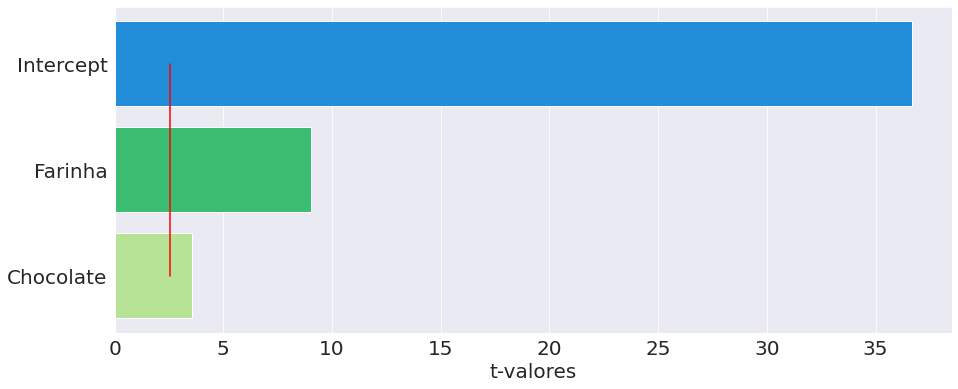

In [53]:
pareto = sns.barplot(x=t_valores, y=nome)
pareto.figure.set_size_inches(15,6)
pareto.tick_params(labelsize=20)
pareto.set_xlabel('t-valores',fontsize=20)

pareto.plot(limite,nome,'r')


<font color='red' style='font-size: 30px;'> Preditos por observados  </font>
<hr style='border: 2px solid red;'>

In [54]:
observados = experimento['Porcoes']

In [55]:
observados

0    19
1    37
2    24
3    49
4    29
5    30
6    29
7    30
Name: Porcoes, dtype: int64

### .

In [57]:
preditos = modelo_ajustado_2.predict()

In [58]:
preditos

array([15.875, 37.375, 24.375, 45.875, 30.875, 30.875, 30.875, 30.875])

### .

In [59]:
import matplotlib.pyplot as plt

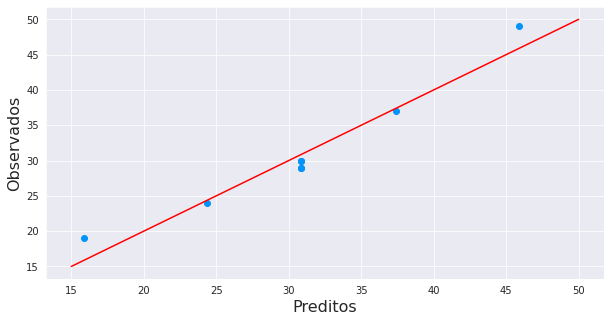

In [64]:
plt.figure(figsize=(10,5))
plt.xlabel('Preditos',fontsize=16)
plt.ylabel('Observados',fontsize=16)


#Linhas de guia
x = np.linspace(start =  15, stop=50,num= 10)
y = np.linspace(start =  15, stop=50,num= 10)

plt.plot(x,y,'r')
plt.scatter(preditos,observados)

In [65]:
print(modelo_ajustado_2.summary())

                            OLS Regression Results                            
Dep. Variable:                Porcoes   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     47.09
Date:                Wed, 29 Jun 2022   Prob (F-statistic):           0.000571
Time:                        02:23:52   Log-Likelihood:                -16.416
No. Observations:                   8   AIC:                             38.83
Df Residuals:                       5   BIC:                             39.07
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.8750      0.842     36.658      0.0

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))


<hr>

### .

# <font color = 'purple'> Explorando o modelo   </font>


<p style='margin: 30px 30px;'>
    
<hr style = 'border: 1px solid purple;'>

In [66]:
parametros = modelo_ajustado_2.params

In [67]:
parametros

Intercept    30.875
Farinha      10.750
Chocolate     4.250
dtype: float64

### .

### Definindo a função

In [73]:
def modelo_receita(x_f,x_c):

  #limite
  limite_normalizado = [-1,+1]
  limite_farinha = [0.5,1.5]
  limite_chocolate = [0.1,0.5]

  #converter
  x_f_convertido = np.interp(x_f,limite_farinha,limite_normalizado)
  x_c_convertido = np.interp(x_c,limite_chocolate,limite_normalizado)


  porcoes = parametros['Intercept'] + parametros['Farinha']*x_f_convertido + parametros['Chocolate']*x_c_convertido
  return round(porcoes)


In [75]:
modelo_receita(0.8,0.1)

22


<p style='margin: 150px 150px;'>


<hr>

<img width='700px' src='https://github.com/OseiasBeu/StatisticsCourse/blob/main/Curso_Analise_de_Experimentos/figuras/Figura_22.png?raw=1'> 


<hr>

# <font color = 'purple'> Mapa de cores   </font>


<p style='margin: 30px 30px;'>
    
<hr style = 'border: 1px solid purple;'>


<p style='margin: 150px 150px;'>


<hr>

<img width='700px' src='https://github.com/OseiasBeu/StatisticsCourse/blob/main/Curso_Analise_de_Experimentos/figuras/Figura_23.jpg?raw=1'> 

#### Fonte: National Centers for Environmental Prediction


<hr>



<p style='margin: 50px 50px;'>




<p style='margin: 150px 150px;'>


<hr>

<img width='600px' src='https://github.com/OseiasBeu/StatisticsCourse/blob/main/Curso_Analise_de_Experimentos/figuras/Figura_24.png?raw=1'> 


<hr>



<p style='margin: 30px 30px;'>

In [77]:
x_farinha = np.linspace(start=0.5, stop=1.5, num = 10)
x_farinha

array([0.5       , 0.61111111, 0.72222222, 0.83333333, 0.94444444,
       1.05555556, 1.16666667, 1.27777778, 1.38888889, 1.5       ])

In [78]:
x_chocolate = np.linspace(start=0.1, stop=0.5, num = 10)
x_chocolate

array([0.1       , 0.14444444, 0.18888889, 0.23333333, 0.27777778,
       0.32222222, 0.36666667, 0.41111111, 0.45555556, 0.5       ])

### . 

In [79]:
pontos = []

for cont1 in x_farinha:
  temp = []
  for cont2 in x_chocolate:
    temp.append(modelo_receita(cont1,cont2))
  pontos.append(temp)


In [80]:
pontos

[[16, 17, 18, 19, 20, 21, 22, 22, 23, 24],
 [18, 19, 20, 21, 22, 23, 24, 25, 26, 27],
 [21, 22, 23, 23, 24, 25, 26, 27, 28, 29],
 [23, 24, 25, 26, 27, 28, 29, 30, 31, 32],
 [25, 26, 27, 28, 29, 30, 31, 32, 33, 34],
 [28, 29, 30, 31, 32, 33, 33, 34, 35, 36],
 [30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
 [33, 34, 34, 35, 36, 37, 38, 39, 40, 41],
 [35, 36, 37, 38, 39, 40, 41, 42, 43, 43],
 [37, 38, 39, 40, 41, 42, 43, 44, 45, 46]]

### .

### Construindo a superfície de resposta

In [81]:
import matplotlib.cm as cm

https://matplotlib.org/users/colormaps.html

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: UserWarning: The following kwargs were not used by contour: 'linewidth'
  


<a list of 7 text.Text objects>

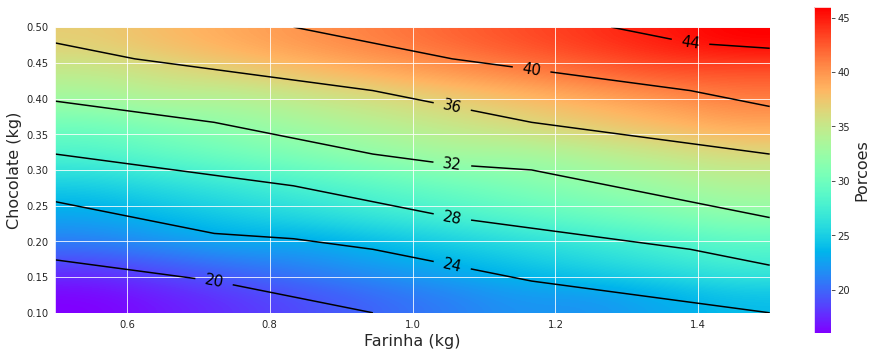

In [88]:
#base 
plt.figure(figsize= (16,6))
plt.xlabel('Farinha (kg)',fontsize=16)
plt.ylabel('Chocolate (kg)',fontsize=16)

#Mapa de cores
mapa_cor = plt.imshow(pontos,origin='lower', cmap = cm.rainbow,interpolation='quadric',extent=(0.5,1.5, 0.1,0.5))

#Barra de cor
plt.colorbar().set_label('Porcoes',fontsize=16)

#linha

linhas = plt.contour(x_farinha, x_chocolate,pontos,colors='k',linewidth=1.5)
plt.clabel(linhas,inline=True,fmt='%1.0f',fontsize=15.0,inline_spacing=10)